<a href="https://colab.research.google.com/github/Pratyush562003/LLM/blob/main/Pipelines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Hello World")

Hello World


In [ ]:
!pip install -q transformers dataset diffusers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-adk 1.11.0 requires sqlalchemy<3.0.0,>=2.0, but you have sqlalchemy 1.4.54 which is incompatible.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.54 which is incompatible.


In [ ]:
!pip install transformers dataset diffusers --use-deprecated=legacy-resolver


In [ ]:
#imports

import torch
from transformers import pipeline
from diffusers import DiffusionPipeline
from datasets import load_dataset
import soundfile as sf
from IPython.display import Audio

In [10]:
#Sentiment Analysis

classifier = pipeline("sentiment-analysis")
result = classifier("I'm super excited to be on the way to LLM Mastery!")
print(result)

Device set to use cuda


[{'label': 'POSITIVE', 'score': 0.9993460774421692}]


In [11]:
#Named Entity Recognition

ner = pipeline("ner", grouped_entities=True, device="cuda")
result=ner("Barack Obama was the 44th president of the United States")
print(result)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda
/usr/local/lib/python3.12/dist-packages/transformers/pipelines/token_classification.py:186: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


[{'entity_group': 'PER', 'score': np.float32(0.99917996), 'word': 'Barack Obama', 'start': 0, 'end': 12}, {'entity_group': 'LOC', 'score': np.float32(0.9984549), 'word': 'United States', 'start': 43, 'end': 56}]


In [12]:
#Question Answering with Context

question_answerer = pipeline("question-answering", model="distilbert-base-cased-distilled-squad", device="cuda")
result = question_answerer(question="Who was the 44h president of the United States?", context="Barack Obama was the 44th president of the United States")
print(result)

config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Device set to use cuda


{'score': 0.9890133738517761, 'start': 0, 'end': 12, 'answer': 'Barack Obama'}


In [13]:
#Text Summarization

summarization = pipeline("summarization", device="cuda")
text = """In a rapidly evolving digital landscape, the boundaries between technology, creativity, and human behavior are constantly shifting. Every innovation that emerges not only transforms the way we interact with machines but also redefines the way we interact with each other. Imagine a world where artificial intelligence doesn’t just answer questions, but anticipates needs, where data doesn’t simply reflect the past, but actively shapes the future. Within this vast ecosystem, collaboration becomes more than a buzzword—it becomes the driving force that empowers communities, organizations, and individuals to harness complexity for meaningful progress."""
summary = summarization(text, max_length=50, min_length=25, do_sample=False)
print(summary)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

Device set to use cuda


[{'summary_text': " In a rapidly evolving digital landscape, the boundaries between technology, creativity, and human behavior are constantly shifting . Imagine a world where artificial intelligence doesn't just answer questions, but anticipates needs, where data doesn't simply reflect the past,"}]


In [14]:
#Translation

translator = pipeline("translation_en_to_fr", device="cuda")
result = translator("I'm super excited to be on the way to LLM Mastery!")
print(result)

No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda


[{'translation_text': "Je suis super excité d'être sur le chemin de LLM Mastery!"}]


In [18]:
#Classification

classifier = pipeline("zero-shot-classification",device="cuda")
result = classifier("Hgugging Face's Transformers library is amazing", candidate_labels=["technology","sports","politics"])
print(result)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda


{'sequence': "Hgugging Face's Transformers library is amazing", 'labels': ['technology', 'sports', 'politics'], 'scores': [0.9466384649276733, 0.03358948603272438, 0.019772091880440712]}


In [19]:
#Text Generation

generator = pipeline("text-generation", device="cuda")
result = generator("If there's one thing I want you to remember about using HuggingFace pipelines, it's")
print(result[0]['generated_text'])

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


If there's one thing I want you to remember about using HuggingFace pipelines, it's the one that's most commonly used. In this example, we'll be using the HuggingFace Pipeline to generate a face for the original paper we're showing now. I'm using HuggingFace as the name for this pipeline, so if you're not familiar with it, it's an open source project that makes it easy to use. If you're not familiar with HuggingFace, it's a way to easily generate a face for a paper without having to build it yourself.

We'll need some data to start the pipeline. First thing we need is the data to be generated by the pipeline. This data is the data we've been storing in our dataset into a file. We'll be using a simple expression to make it work.

The first thing we need is the data to be processed. The first thing we need is the data to be processed. You can use a syntax like this:

data = [

{

name : "Eagle",

type : "c",

name : "Humpback",

type : "d",

name : "Pig",

type : "r",

name : "Blackbird"

model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/681M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/909 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/1.73G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.fp16.safeten(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

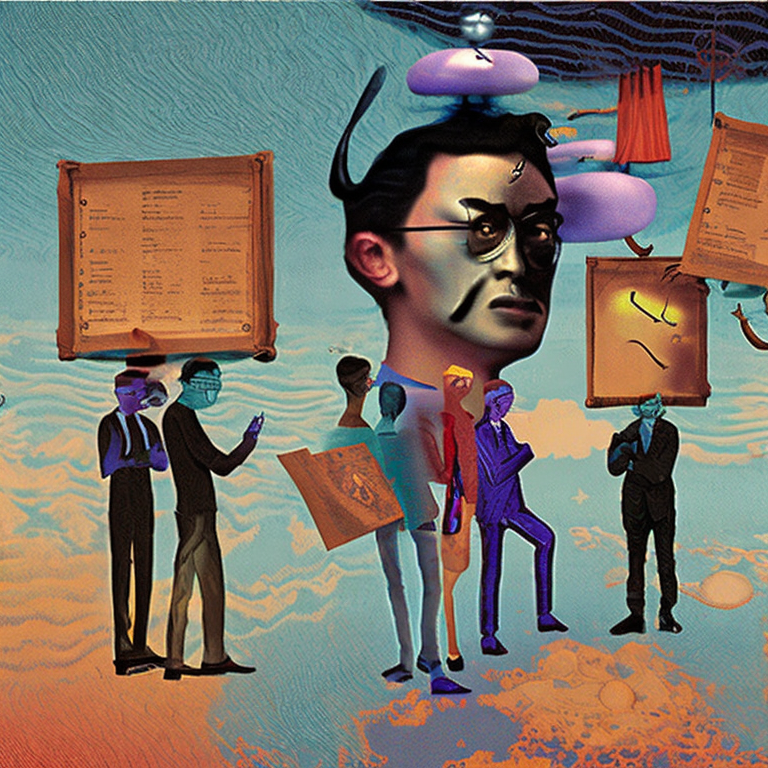

In [20]:
#Image Generation

# Image Generation
image_gen = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16"
    ).to("cuda")

text = "A class of Data Scientists learning about AI, in the surreal style of Salvador Dali"
image = image_gen(prompt=text).images[0]
image
